# EDA on class distribution

**Project specifications**
- Minimum 3 classes, with defining characteristics (easily separable to other classes)
- 1000 images per class (ideally)

**Classes with more than 1000 images**
- Excluding Blank images, unknown species and birds, including the Crestless Curassow and Spix's Guan (per Jacqueline's request), we have 11 classes:

|Number|Species|Number of images|
|----|----|----|
|1|Collared Peccary                 |24754|
|2|Black Agouti                     |13654|
|3|Dasypus Species (armadillo)      |5690|
|4|Spotted Paca                     |5309|
|5|Rodent                           |4018|
|6|White-lipped Peccary             |3813|
|7|Bos Species (cow)                |3601|
|8|South American Coati             |2883|
|9|Lowland Tapir                    |1550|
|10|Southern Tamandua               |1385|
|11|Domestic Horse                  |1000|


**Option 1: many classes, many cameras**
- I would suggest removing "rodent", given that other species are also in this category so easily confusable. That qould leave us with 10 classes, which we could downsample to have 1000 images of each.
- The only caveat is that we would have to use images from different camera sources, so that might be tricky. (47 cameras in the case of one species, 3 in the case of another)

**Option 2: fewer classes, single camera**
- Less exciting, but probably easier
- A single camera doesn't meet the criteria for > 1000 images per class in a 3-way classification, so we need at least two cameras.
- Using cameras N29 and A04, we can classify three species, with > 1000 images each: Collared Peccary,Black Agouti, Spotted Paca. Problem: two of them are rodents, so pretty similar.

|Number|Species|Classification|Traits|
|----|----|----|----|
|1|Collared Peccary           |Animalia-Chordata-Mammalia-Artiodactyla-Tayassuidae-*Dicotyles tajacu*|Small tusks|
|2|Black Agouti               |Animalia-Chordata-Mammalia-Rodentia-Dasyproctidae-*Dasyprocta fuliginosa*|White throat|
|3|Spotted Paca               |Animalia-Chordata-Mammalia-Rodentia-Cuniculidae-*Cuniculus paca*|Spotted lines on its sides|

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.cm as cm


In [ ]:
image_labels = pd.read_csv('~/OneDrive/Berkeley/W281_Computer_vision/final_project/images_labels.csv')
image_labels.head()

,filename,timestamp,image_id,common_name,sp_num
0,N25/03310082.JPG,2020-03-31T14:28:14Z,902b671f-58b9-4cb0-9898-bd53c9909e51,Collared Peccary,1
1,N29/03310288.JPG,2020-03-31T06:49:17Z,e727dc42-5ebb-46a0-a979-eac158c050e6,Collared Peccary,1
2,A06/06020479.JPG,2020-06-02T08:12:17Z,db3c3213-5ad9-4bf7-94a8-92ded5efb5a5,Black Agouti,1
3,A02/03100387.JPG,2020-03-10T06:58:27Z,c7e33138-08ac-461d-a267-ba44a2f123ad,Unknown species,1
4,A04/04180034.JPG,2020-04-18T05:37:56Z,52f77e0c-7023-4087-8414-26848579d14f,Bos Species,1


## Count total number of images per camera

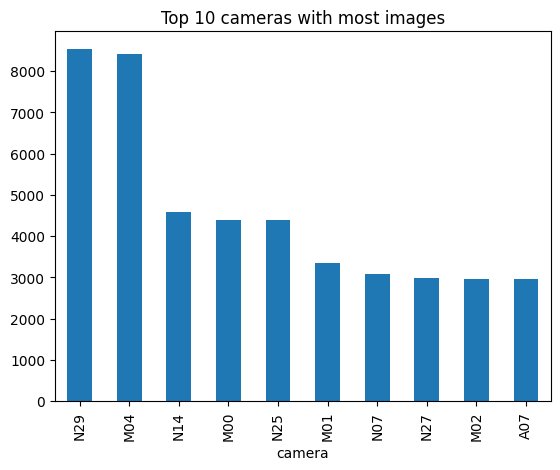

In [ ]:
#split filename into camera and image number
image_labels['camera'] = image_labels['filename'].str.split('/').str[0]
image_labels['image_number'] = image_labels['filename'].str.split('/').str[1]

# count number of images per camera
total_sp_per_camera = image_labels.groupby('camera')['sp_num'].sum().sort_values(ascending=False)
total_sp_per_camera

# plot cameras with most species
total_sp_per_camera.head(10).plot(kind='bar', title='Top 10 cameras with most images')
plt.pyplot.show()

## Count total number of images per class


In [ ]:
# All species
total_sp_num = image_labels.groupby('common_name')['sp_num'].sum().sort_values(ascending=False)
total_sp_num

common_name
Collared Peccary                24754
Blank                           20027
Black Agouti                    13654
Dasypus Species                  5690
Bird                             5655
Spotted Paca                     5309
Rodent                           4018
White-lipped Peccary             3813
Bos Species                      3601
South American Coati             2883
Lowland Tapir                    1550
Southern Tamandua                1385
Crestless Curassow               1343
Spix's Guan                      1326
Unknown species                  1277
Domestic Horse                   1000
Possum Family                     951
Cervidae Family                   900
Giant Anteater                    807
Tayra                             415
White-tailed Deer                 408
Ocelot                            363
Amazonian Motmot                  262
Northern Amazon Red Squirrel      253
Margarita Island Capuchin         220
Lizards and Snakes                210


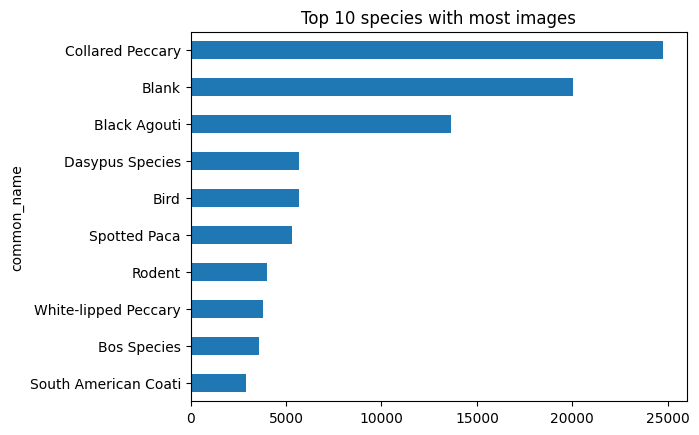

In [ ]:
top = total_sp_num.head(10)
sorted_sp_num = top.sort_values(ascending=True)
sorted_sp_num.plot(kind='barh', title='Top 10 species with most images')
plt.pyplot.show()



## Species categories in camera with most images

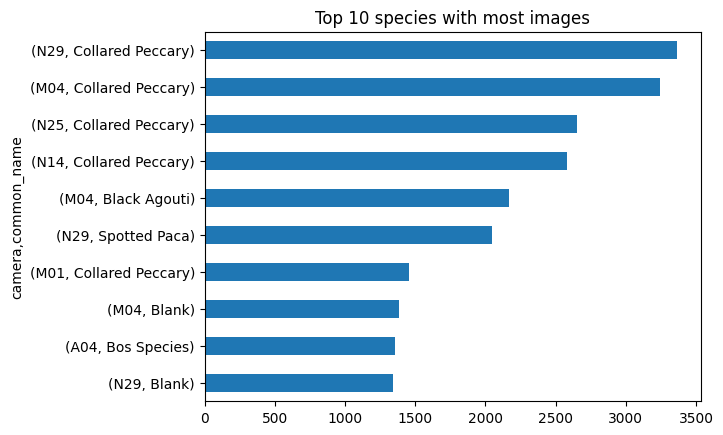

In [ ]:
# N29 - 8530
# group by camera and species
total_sp_per_camera = image_labels.groupby(['camera', 'common_name'])['sp_num'].sum().sort_values(ascending=False)
topcam = total_sp_per_camera.head(10)
sorted_cam_num = topcam.sort_values(ascending=True)
sorted_cam_num.plot(kind='barh', title='Top 10 species with most images')
plt.pyplot.show()


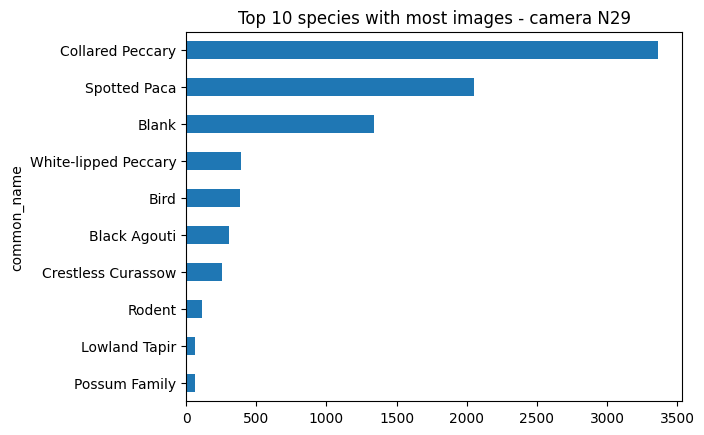

In [ ]:
# N29 - 8530
# plot most common species in camera N29
total_sp_per_camera = image_labels[image_labels['camera'] == 'N29'].groupby('common_name')['sp_num'].sum().sort_values(ascending=False)
top_n29 = total_sp_per_camera.head(10)

sorted_top_n29_num = top_n29.sort_values(ascending=True)
sorted_top_n29_num.plot(kind='barh', title='Top 10 species with most images - camera N29')
plt.pyplot.show()



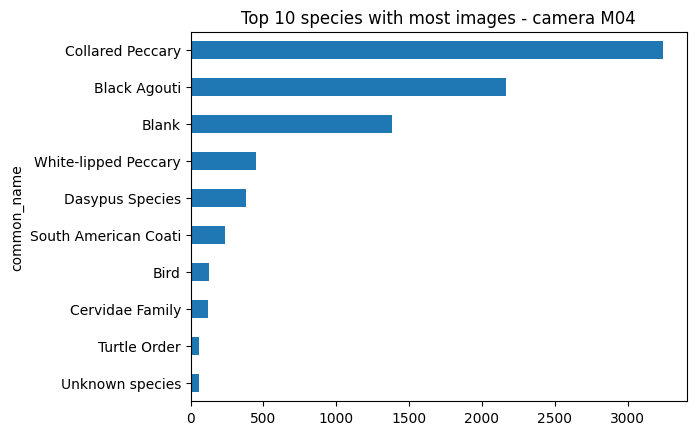

In [ ]:
# M04 - 8418
total_sp_per_camera = image_labels[image_labels['camera'] == 'M04'].groupby('common_name')['sp_num'].sum().sort_values(ascending=False)
top_m04 = total_sp_per_camera.head(10)

sorted_top_m04_num = top_m04.sort_values(ascending=True)
sorted_top_m04_num.plot(kind='barh', title='Top 10 species with most images - camera M04')
plt.pyplot.show()

## Assuming we choose our 10 classes, which cameras would we need?

- We definitely wouldn't be able to use a single camera

In [ ]:
our_species = ['Collared Peccary',
                'Black Agouti',
                'Dasypus Species',
                'Spotted Paca',
                'White-lipped Peccary',
                'Bos Species',
                'South American Coati',
                'Lowland Tapir',
                'Southern Tamandua',
                'Domestic Horse']

# create df of only our_species
our_species_df = image_labels[image_labels['common_name'].isin(our_species)]

# group by camera and species
total_sp_per_camera = our_species_df.groupby(['camera', 'common_name'])['sp_num'].sum().sort_values(ascending=False)



In [ ]:
# show all cameras where "Domestic Horse" was spotted
horse = our_species_df[our_species_df['common_name'] == 'Domestic Horse'].groupby('camera')['sp_num'].sum().sort_values(ascending=False)
horse

camera
A07    950
A04     49
A09      1
Name: sp_num, dtype: int64

In [ ]:
our_species_df.columns

Index(['filename', 'timestamp', 'image_id', 'common_name', 'sp_num', 'camera',
       'image_number'],
      dtype='object')

In [ ]:
# find number of cameras where each species was found
total_sp_per_camera = our_species_df.groupby('common_name')['camera'].nunique().sort_values(ascending=False)
total_sp_per_camera


common_name
Dasypus Species         47
Black Agouti            45
Collared Peccary        45
South American Coati    44
Southern Tamandua       42
Spotted Paca            40
Lowland Tapir           27
White-lipped Peccary    20
Bos Species             16
Domestic Horse           3
Name: camera, dtype: int64

In [ ]:
print(our_species_df.columns)


Index(['filename', 'timestamp', 'image_id', 'common_name', 'sp_num', 'camera',
       'image_number'],
      dtype='object')


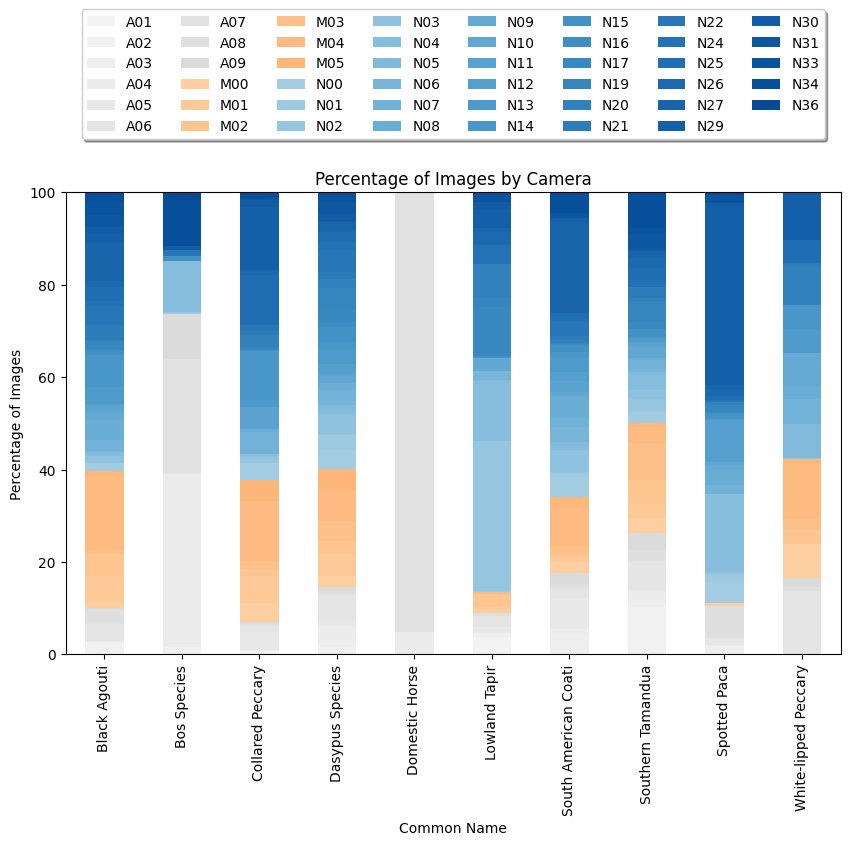

In [ ]:
grouped_data = our_species_df.groupby(['common_name', 'camera'])['sp_num'].sum().unstack(fill_value=0)
total_images = grouped_data.sum(axis=1)
grouped_data_percentage = grouped_data.divide(total_images, axis=0) * 100

# Define a dictionary to map camera names to color palettes
camera_palettes = {
    name: cm.Blues if name.startswith('N') else cm.Greys if name.startswith('A') else cm.Oranges if name.startswith('M') else cm.Greys
    for name in grouped_data_percentage.columns
}

# Create a custom color list using the dictionary
n_colors = len(grouped_data_percentage.columns)
colors = []
for i, (name, palette) in enumerate(camera_palettes.items()):
    colors.append(palette(np.linspace(0.1, 0.9, n_colors)[i]))

grouped_data = our_species_df.groupby(['common_name', 'camera'])['sp_num'].sum().unstack(fill_value=0)
total_images = grouped_data.sum(axis=1)
grouped_data_percentage = grouped_data.divide(total_images, axis=0) * 100

ax = grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), ylim=(0, 100), color=colors)
plt.pyplot.ylabel('Percentage of Images')
plt.pyplot.xlabel('Common Name')
plt.pyplot.title('Percentage of Images by Camera')

legend_ncol = 8
plt.pyplot.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=legend_ncol, fancybox=True, shadow=True)

plt.pyplot.show()



## Option 2: fewer classes, single camera

- Select the camera with most species (N29), and see how many species have more than 1000 images on that camera - only 2 species, so we still need more than one camera
- If we choose the top 2 cameras (N29 and M04), we now have 3 species with over 1000 images: Collared Peccary,Black Agouti, Spotted Paca

In [ ]:
# N29
n29 = our_species_df[our_species_df['camera'] == 'N29'].groupby('common_name')['sp_num'].sum().sort_values(ascending=False)
print(f'Camera N29: \n{n29}')
print('-'*30)

# M04
m04 = our_species_df[our_species_df['camera'] == 'M04'].groupby('common_name')['sp_num'].sum().sort_values(ascending=False)
print(f'Camera M04: \n{m04}')
print('-'*30)

n29_m04 = our_species_df[(our_species_df['camera'] == 'N29') | (our_species_df['camera'] == 'M04')].groupby('common_name')['sp_num'].sum().sort_values(ascending=False)
print(f'Cameras N29 and M04: \n{n29_m04}')


Camera N29: 
common_name
Collared Peccary        3365
Spotted Paca            2049
White-lipped Peccary     390
Black Agouti             309
Lowland Tapir             63
South American Coati      25
Dasypus Species           19
Name: sp_num, dtype: int64
------------------------------
Camera M04: 
common_name
Collared Peccary        3244
Black Agouti            2167
White-lipped Peccary     450
Dasypus Species          383
South American Coati     239
Southern Tamandua         46
Lowland Tapir              7
Spotted Paca               6
Name: sp_num, dtype: int64
------------------------------
Cameras N29 and M04: 
common_name
Collared Peccary        6609
Black Agouti            2476
Spotted Paca            2055
White-lipped Peccary     840
Dasypus Species          402
South American Coati     264
Lowland Tapir             70
Southern Tamandua         46
Name: sp_num, dtype: int64


In [ ]:
# Find file names for each species: Collared Peccary,Black Agouti, Spotted Paca
collared_peccary = our_species_df[our_species_df['common_name'] == 'Collared Peccary']['filename']
black_agouti = our_species_df[our_species_df['common_name'] == 'Black Agouti']['filename']
spotted_paca = our_species_df[our_species_df['common_name'] == 'Spotted Paca']['filename']

print(f'Collared Peccary: \n{collared_peccary.head(5)}')
print('-'*30)
print(f'Black Agouti: \n{black_agouti.head(5)}')
print('-'*30)
print(f'Spotted Paca: \n{spotted_paca.head(5)}')

Collared Peccary: 
0     N25/03310082.JPG
1     N29/03310288.JPG
20    N14/06290049.JPG
30    M05/06080210.JPG
34    N07/03030828.JPG
Name: filename, dtype: object
------------------------------
Black Agouti: 
2     A06/06020479.JPG
14    N08/02070189.JPG
26    N33/03080519.JPG
35    N08/02160284.JPG
39    N17/05200608.JPG
Name: filename, dtype: object
------------------------------
Spotted Paca: 
28    A08/02020034.JPG
33    N04/04300387.JPG
47    A08/02020024.JPG
62    N29/03270936.JPG
74    N29/05210312.JPG
Name: filename, dtype: object


In [ ]:
our_species_df.head()

,filename,timestamp,image_id,common_name,sp_num,camera,image_number
0,N25/03310082.JPG,2020-03-31T14:28:14Z,902b671f-58b9-4cb0-9898-bd53c9909e51,Collared Peccary,1,N25,03310082.JPG
1,N29/03310288.JPG,2020-03-31T06:49:17Z,e727dc42-5ebb-46a0-a979-eac158c050e6,Collared Peccary,1,N29,03310288.JPG
2,A06/06020479.JPG,2020-06-02T08:12:17Z,db3c3213-5ad9-4bf7-94a8-92ded5efb5a5,Black Agouti,1,A06,06020479.JPG
4,A04/04180034.JPG,2020-04-18T05:37:56Z,52f77e0c-7023-4087-8414-26848579d14f,Bos Species,1,A04,04180034.JPG
6,A06/06190148.JPG,2020-06-19T11:40:33Z,063c0153-d8fd-46b3-b248-8459ba954ad6,White-lipped Peccary,1,A06,06190148.JPG


# Option 3: More than three cameras, until we get more species with 1000 images each.

In [ ]:
# select top 15 caqmeras with most images
top_cameras = our_species_df.groupby('camera')['sp_num'].sum().sort_values(ascending=False).head(10)
top_cameras

camera
M04    6542
N29    6220
N14    3861
N25    3505
M01    2529
N07    1994
A07    1992
N27    1958
A06    1927
N00    1813
Name: sp_num, dtype: int64

In [ ]:
# select species in top_cameras with most images
top_species = our_species_df[our_species_df['camera'].isin(top_cameras.index)].groupby('common_name')['sp_num'].sum().sort_values(ascending=False)
top_species

common_name
Collared Peccary        15853
Black Agouti             6779
Spotted Paca             2627
White-lipped Peccary     1974
Dasypus Species          1673
South American Coati     1154
Domestic Horse            950
Bos Species               903
Southern Tamandua         298
Lowland Tapir             130
Name: sp_num, dtype: int64

# Load some sample images to see resolution

RGB resolution: (1440, 1920, 3)
RGB data type: uint8
Grayscale resolution: (1440, 1920, 3)
Grayscale data type: uint8


Text(0.5, 1.0, 'Spotted paca')

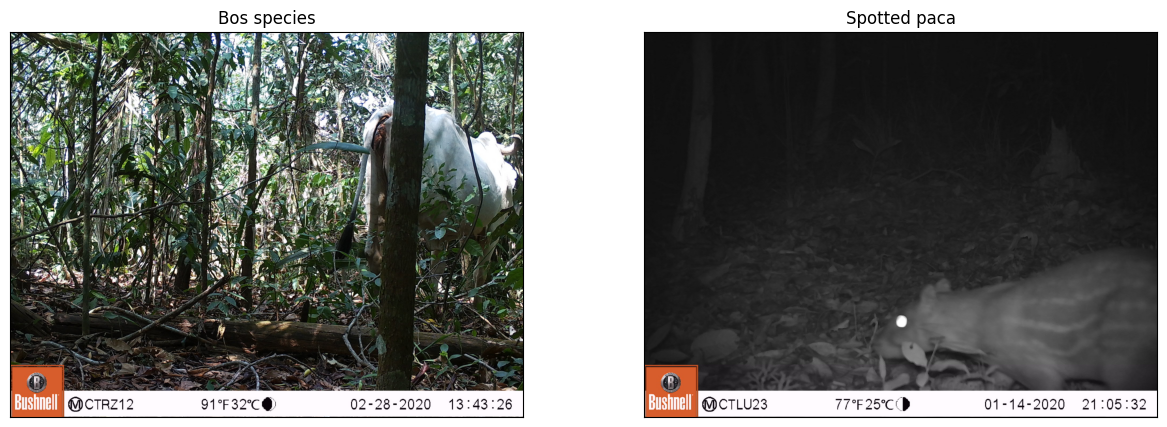

In [ ]:
import matplotlib.pyplot as plt


bos_species = "C:\\Users\\julit\\Downloads\\3860c191-998f-47cf-9015-d1735384d9de.jpeg"
spotted_paca = "C:\\Users\\julit\\Downloads\\ba62cf64-91d0-44c7-a57c-b479f3c8f0f8.jpeg"

im1 = plt.imread(bos_species)
im2 = plt.imread(spotted_paca)


print(f'RGB resolution: {im1.shape}')
print(f'RGB data type: {im1.dtype}')

print(f'Grayscale resolution: {im2.shape}')
print(f'Grayscale data type: {im2.dtype}')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15, 5))

ax1.imshow(im1, cmap='gray',vmin=0, vmax=1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Bos species')


ax2.imshow(im2, cmap='gray',vmin=0, vmax=1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Spotted paca')